In [1]:
import pandas as pd
import numpy as np

In [47]:
from pandas.api.types import is_string_dtype

with open("sample_dataset.csv") as file:
        bestand = pd.read_csv(file,sep=",")

# format the headers
bestand.columns = bestand.iloc[0]
bestand = bestand.drop(bestand.index[0])

# Convert columns to floats
headers_to_float = bestand.columns[3:]
bestand[headers_to_float] = bestand[headers_to_float].astype(float)

(189, 23) (189, 9)
Explained variance: 0.9107628742246504


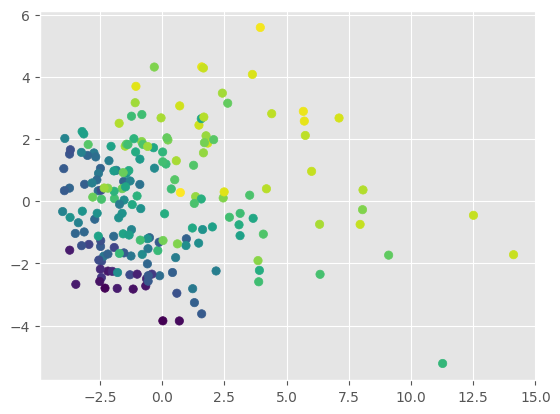

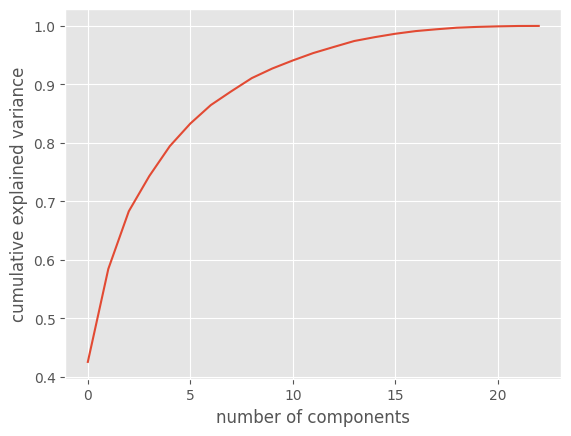

Meaning of the 2 components:
-0.03 x Silt + 0.00 x Sand + 0.07 x pH + 0.17 x Aggregate Stability + -0.16 x Bulk Density + 0.19 x Corg_Clay + 0.25 x Organic Carbon + 0.21 x Dissolved Org. Carbon + -0.11 x Carbon-to-Nitrogen + 0.26 x Ergosterol + 0.27 x Microbial Carbon + 0.25 x Microbial Nitrogren + 0.10 x Microbial Phosphorus + 0.18 x Manosamine + 0.28 x Muramic Acid + 0.27 x Glucosamine + 0.28 x Sum Aminosugars + 0.25 x LAP + 0.22 x NAG + 0.23 x GLU + 0.24 x XYL + 0.24 x CEL + 0.13 x PHO 

-0.39 x Silt + 0.41 x Sand + -0.32 x pH + 0.33 x Aggregate Stability + -0.11 x Bulk Density + 0.35 x Corg_Clay + 0.19 x Organic Carbon + 0.24 x Dissolved Org. Carbon + -0.04 x Carbon-to-Nitrogen + 0.01 x Ergosterol + -0.09 x Microbial Carbon + -0.16 x Microbial Nitrogren + -0.02 x Microbial Phosphorus + 0.02 x Manosamine + 0.06 x Muramic Acid + 0.01 x Glucosamine + 0.04 x Sum Aminosugars + -0.18 x LAP + -0.08 x NAG + -0.23 x GLU + -0.22 x XYL + -0.21 x CEL + 0.15 x PHO 

0.21 x Silt + -0.26 x Sand +

In [85]:
from sklearn.decomposition import PCA

#features to consider
features = ["Silt","Clay","Sand","pH","Aggregate Stability"]

# standardize
values = bestand.iloc[:, 4:]
values = (values - values.mean()) / values.std()

target = bestand["Aggregate Stability"].unique()
# Retain90% of variance
pca_soil = PCA(0.9)
x_proj = pca_soil.fit_transform(values)

print(values.shape, x_proj.shape)
print("Explained variance:",np.sum(pca_soil.explained_variance_ratio_))

# Show a scatter plot of the first two components
plt.scatter(x_proj[:,0],x_proj[:,1],c=target)
plt.show()

# Show explained variance cumsum
pca = PCA().fit(values)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

#Trying to decipher the meaning of the principal components
print("Meaning of the 2 components:")
for component in pca.components_[0:4]:
    print(" + ".join("%.2f x %s" % (value, name)
                     for value, name in zip(component, values.columns)),"\n")


# get the index of the most important feature on EACH component
n_pcs = pca_soil.components_.shape[0]
most_important = [np.abs(pca_soil.components_[i]).argmax() for i in range(n_pcs)]
most_important_values = []
for i in range(len(pca_soil.components_)):
    val = most_important[i]
    most_important_values.append(pca_soil.components_[i][val])

# get the names
initial_feature_names = bestand.columns[4:]
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}
most_important_components_df = pd.DataFrame(dic.items())
most_important_components_df["Values"] = most_important_values
print("Most important components:",most_important_components_df)